# ITMAL Exercise

REVISIONS| |
---------| |
2018-0318| CEF, initial.
2018-0321| CEF, finally got moon fit to work, it is rather prone to flat-plateau gradient problems.
2018-0321| CEF, major revision.
2018-0323| CEF, minor updated and spell checked.
2019-1002| CEF, updated for ITMAL E19.

## Multi-layers Perceptrons (MLP)

By stacking up neurons in layers we can create an MLP.

<img src="https://itundervisning.ase.au.dk/E19_itmal/L06/Figs/mlpfully_simple.png" style="width:400px">
<small><em>
    <center>An example of a fully-connected three-layer MLP.</center> 
</xsmall></center>
</em></small>


## Keras Multi-Layer Perceptrons: the `Sequential` model

In this exercise well will try to build fully-connected MLP, via the `keras` API.  Once Keras is installed (good luck), you can use it as front-end to Tensorflow and its highly optimized MLP implementations.

In Keras-terms an MLP is a `Sequential` model. This model can be made out of fully-connected, or in Keras terms `Dense`, layers. Later we see other types of layers that are not fully-connected, like convolutional 2D layers, Conv2D.

OPTIONAL: more info on Keras' `Sequential` model

> https://keras.io/getting-started/sequential-model-guide/

## Keras Multi-Layer Perceptrons on Moon-data

Below are some cells for running a Keras `Sequential` model on the moon-data.

The first cell setup the keras model, load the data and initiates the fit.

The second and third cell plots various aspects of the training, using the _history_ from the Keras model.

Now, many Keras functions are not as well documented compared to Scikit-learn and even though many elements seem to be equal in the Keras and Sckikit-learn domain, they are not 100% equal, for example, Keras comes with some metrics like

> `categorical_accuracy` and `binary_accuracy`

but has no `F1` or `precision` or `recall`.

### Qa Using a Keras MLP on the Moon-data

Run the three cells below, and inspect the plots. I get an accuracy of 0.96 using the setup below.

Now, change the optimizer from `Adam` to our well-known `SDG` method, using

> `optimizer = SGD(lr=0.1)`

instead of `ADAM(lr=0.1)`.

Does it still produce a good score, in form of the `categorical_accuracy`? My accuracy now drops to 0.88, and the new decision boundary looks like a straight line!

Find a way to make the `SDG` produce a result similar to the `ADAM` optimizer: Maybe you need to crack up the number of `EPOCHS` during training to get a better result using the `SGD` optimizer? 

In [1]:
# TODO: Qa..run Keras on Moon, cell 1

#from libitmal import kernelfuns as itmalkernelfuns
#itmalkernelfuns.EnableGPU()                              
#itmalkernelfuns.DisableGPU()   

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn import datasets

import numpy as np
from time import time

np.random.seed(42)

# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=2, activation="softmax"))

#optimizer = SGD(lr=0.1)
optimizer = Adam(lr=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Make data
X, y = datasets.make_moons(n_samples=2000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 35

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
OK, training time=5.9


Training time: 5.9 sec
Test loss:     0.09513562843203545
Test accuracy: 0.97
All scores in history: [0.09513562843203545, 0.97, 0.02620184186846018, 0.05332985942562421]


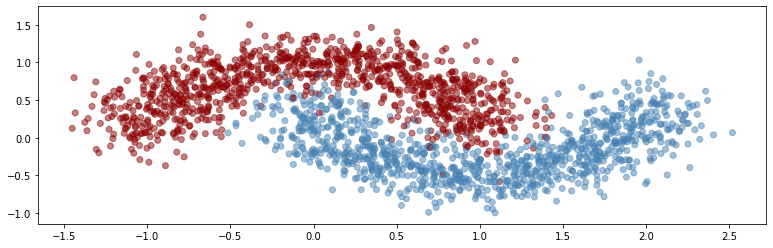

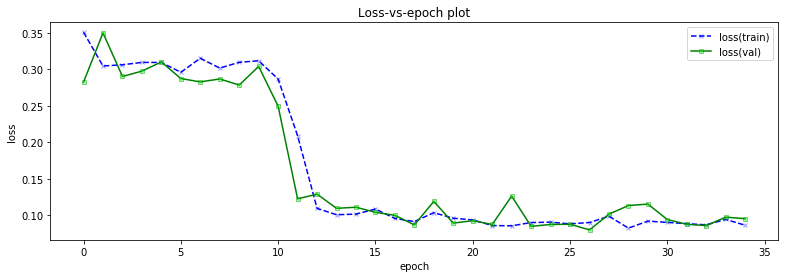

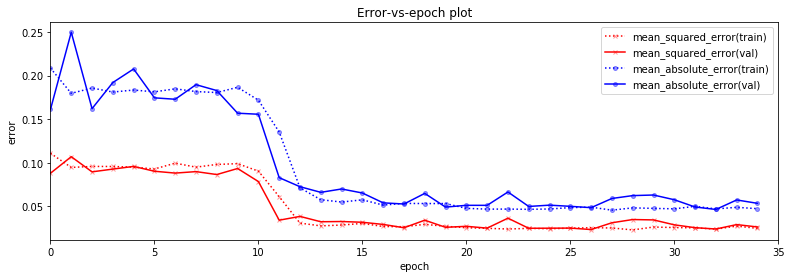

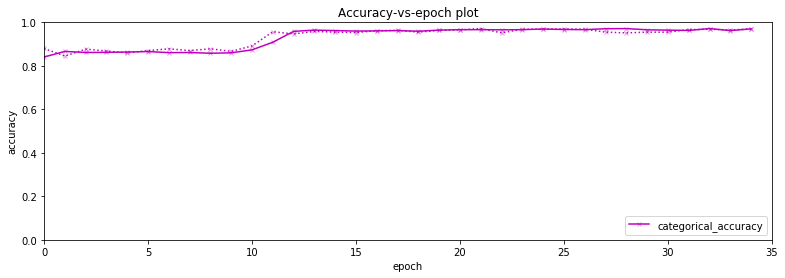

In [2]:
# TODO: Qa..run Keras on Moon, cell 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

-1.9518620422152178 3.020158914941262
-1.4964213935621906 2.0987514590023753


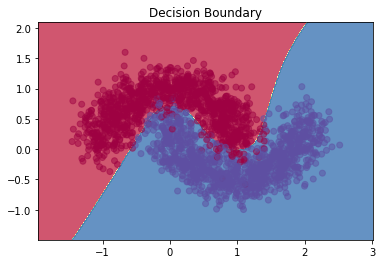

In [17]:
# TODO: Qa..run Keras on Moon, cell 3

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
        
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()

### Using SGD as optimizer:


In [4]:
# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=2, activation="softmax"))

#optimizer = SGD(lr=0.1)
optimizer = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Make data
X, y = datasets.make_moons(n_samples=2000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 35

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

OK, training time=4.4


Training time: 4.4 sec
Test loss:     0.27742069999376934
Test accuracy: 0.8850000007947286
All scores in history: [0.27742069999376934, 0.8850000007947286, 0.08660203397274018, 0.17148618737856547]


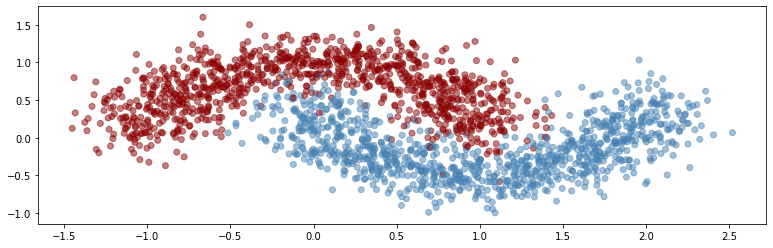

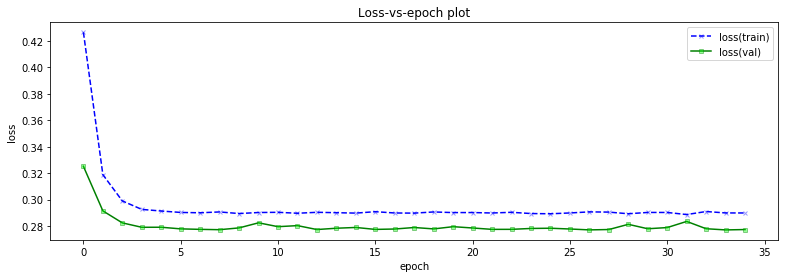

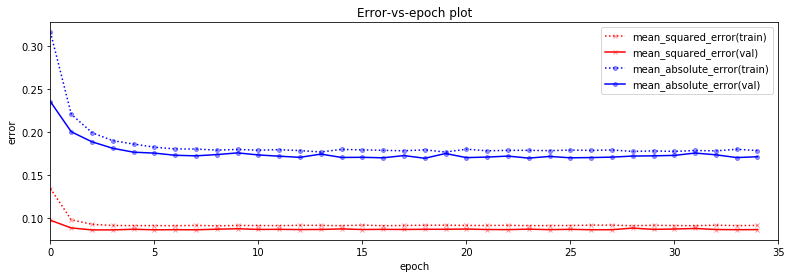

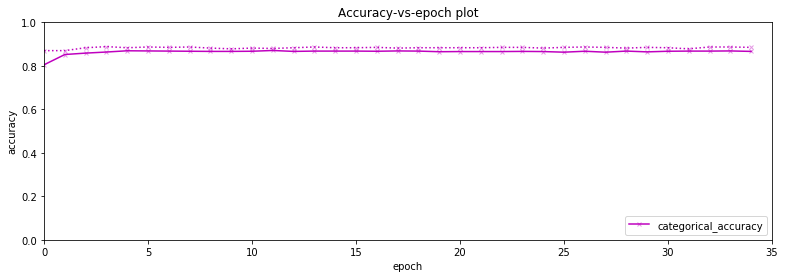

In [5]:
#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

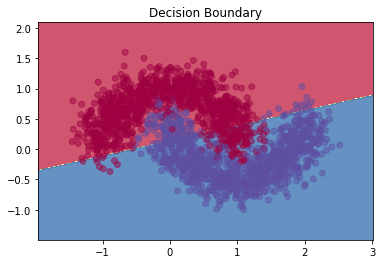

In [6]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()

It can be shown that after using the SGD instead of ADAM the accuracy has droped from 0.96 to 0.88. Furthermore it can be seen that the dessition boundary no longer curved arround the data bur cuts through as a straiche line. This will is the cause of the droped accuracy since som of the data will bed wrongly clasified ehen the dessition boundery dos'nt follow the curve of the data.

We wil now attempt to improve the SGD optimizer to get a result closer to the one produced by the ADAM optimizer.


### Improving the SGD optimizer:

In [7]:
# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=2, activation="softmax"))

#optimizer = SGD(lr=0.1)
optimizer = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Make data
X, y = datasets.make_moons(n_samples=2000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 1200

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

OK, training time=154.6


Training time: 154.6 sec
Test loss:     0.08003662352760633
Test accuracy: 0.9633333333333334
All scores in history: [0.08003662352760633, 0.9633333333333334, 0.0236619225765268, 0.047465244432290395]


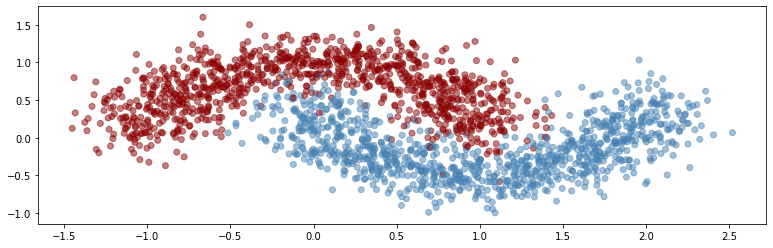

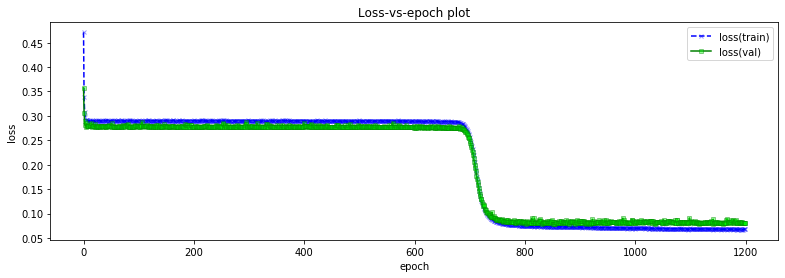

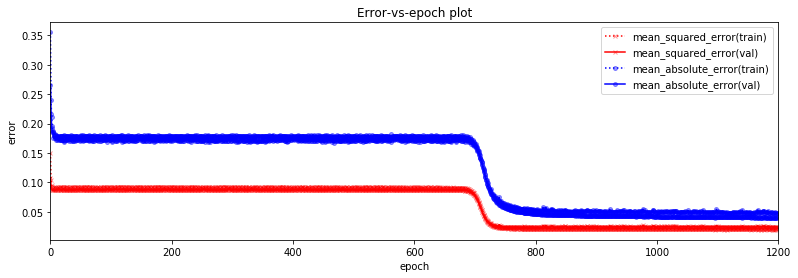

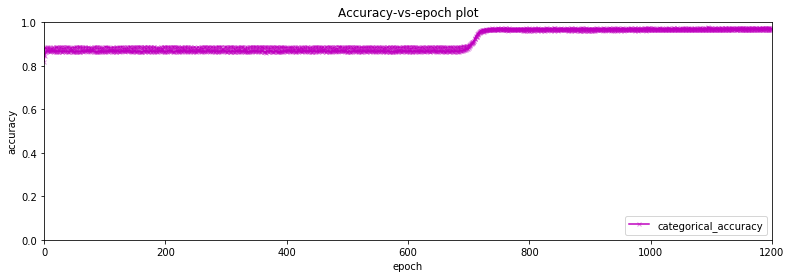

In [8]:
#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

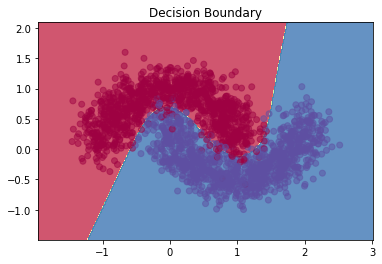

In [9]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()

SGD is a stochastic gradient optimizer while ADAM is a adaptive optimization method. This means that ADAM preformes local optimization based on the history of iterations ([Article: Adaptive gradient optimicer](https://arxiv.org/abs/1705.08292)) while SGD optimizes on the the the instances individiually.

This is why we only need 35 EPOCHS when using ADAM to get a high accuracy and decision boundary that fits the curved moon data. And the reason why we need 1000 EPOCHS or above to get a high accuracy and a boundery that fits the moon data when using SGD. 

A problem with setting the EPOCHS as high as 1000 and above is that it takes a long time to compile because we have 1000 iterations and therefore runs 1000 times 2000 (the number of datapoints) calculations. Another thing to note is the accuracy is stil a little lower when using SGD compared to using ADAM. 

(Also see [Link to article abot the use of SGD vs ADAM](https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/))

### Qb  Keras and Classification Categories

It is customary practice to convert both binary and multiclass classification labels to a one-hot encoding. 

Explain one-hot encoding and the 

```python
y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)
```

Why use one-hot encoding, and when? 

### ANSWER:
#### One-hot encoding:
One-hot encoding is a ML meathod that is used to transform categorical data into numerical og binary data.

The reason why it can be nessesary to convert categorical data is because they  f.ex.can contain labels in the form of strings such as "Dog", "Cat" or "Horse". These labels cannot be read an intrepreted by all machine learning algorithms and therefore it can be nessesary to convert the labels into binary values. this means that in the example where we have tree different animals we have 3 categories and can therefor represent each category as a binary representation with 3 values:

In [10]:
import pandas as pd
pets=pd.DataFrame({"Dog"   : ['1', '0', '0'],
                   "Cat"   : ['0', '1', '0'],
                   "Horse" : ['0', '0', '1']})

pets.style

,Dog,Cat,Horse
0,1,0,0
1,0,1,0
2,0,0,1


The text about One-hot encoding above is written from the understanding of the article ["Why One-Hot Encode Data in Machine Learning?"](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) by Jason Brownlee on July 28, 2017

The code:
```python
y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)
```
Uses keras function ```python to_categorical()``` which converts a vector of classes into a matrix with a binary representation of the classes. To explain how this happens lets just look at ```y_train_binary = to_categorical(y_train)```.

The Moon dataset has 2 categories and therefore we expect the labels to be ```0``` and ```1```. First we print the the first 5 entities in ```y_train``` and ```y_train_binary```:


In [11]:
y_train_binary = to_categorical(y_train)

print("y_train = \n",y_train[0:5])
print("\ny_train_binary = \n",y_train_binary[0:5])



y_train = 
 [0 1 1 0 1]

y_train_binary = 
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


 In ```y_train``` we can see the categories represented and in  ```y_train_binary``` se see the catecories represented as a binary colum.
 
|                  | "0" | "1" |
| ---              | --- | --- |
| ```y_train[0]``` |  1  |  0  |
| ```y_train[1]``` |  0  |  1  |
| ```y_train[2]``` |  0  |  1  |
| ```y_train[3]``` |  1  |  0  |
| ```y_train[4]``` |  0  |  1  |

Here we can se that the categories represented as binary values like in one-hot encoding and therefore ```python to_categorical()``` makes a one-hot encoding of class vectores.  
[Link to keras documentation](https://keras.io/utils/)


#### A side note on Keras and metrics

The metrics in Keras are using Tensorflow function internally and can be difficult to work with compared to what we know from Scikit-lean. You can get the accuracy from Keras adding it to the metrics list like

```python
metrics=['categorical_accurac### Qb  Keras and Classification Categories

It is customary practice to convert both binary and multiclass classification labels to a one-hot encoding. 

Explain one-hot encoding and the 

```python
y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)
```

Why use one-hot encoding, and when? y',..
```

Also note that Keras'  `categorical_accuracy` is implemented as
```
def categorical_accuracy(y_true, y_pred):
    return K.cast(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)), K.floatx())

```
and from this you get a result as a TensorFlow tensor type like
```python
y_pred_test_binary = model.predict_classes(X_test)
acc = keras.metrics.categorical_accuracy(y_test_binary, y_pred_test_binary)
print(acc)
```
that prints
````
Tensor("Cast_1:0", shape=(600,), dtype=float32)
```
instead of `numpy.arrays` types, and these TF-types are difficult to work with directly.

### Qc Optimize the Keras Model

Now, try to optimize the model by 

* increasing/decreasing the number of epochs,
* adding more neurons per layer, 
* adding whole new layers,
* changing the activation functions in the layers,
* changing the output activation from `activation="softmax"` to something else,

Comment on your changes, and relate the resulting accuracy, accuracy-vs-epochs, loss-vs-epoch and decision boundary plots to your changes, ie. try to get a feeling of what happens when you modify the model hyperparameters. 

NOTE: Many times the model seems to get stuck on an extreme flat loss plateau, and the decision boundary displays just a 'dum' straight line through the moons!

OPTIONAL: should the moon data be standardized or normalized to say range [-1;1] in both $\mathbf x$-dimensions? Will it help, or is the data OK as-is?

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn import datasets

import numpy as np
from time import time

np.random.seed(42)

# Build Keras model 
model = Sequential()
# Adding layers to to the model
# model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(units=2, activation="softmax"))

# model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(4,activation='tanh')) # New hidden layer with 4 params
# model.add(Dense(units=2, activation="softmax"))

# model.add(Dense(input_dim=2, units=8, activation="relu", kernel_initializer="normal"))
# model.add(Dense(4,activation='relu')) # New hidden layer with 4 params
# model.add(Dense(units=2, activation="softmax"))

# model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(4,activation='tanh')) # New hidden layer with 4 params
# model.add(Dense(units=2, activation="sigmoid"))


# model.add(Dense(input_dim=2, units=2, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(units=2, activation="softmax"))

model.add(Dense(input_dim=2, units=50, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=2, activation="softmax"))



#optimizer = SGD(lr=0.1)
optimizer = Adam(lr=0.1)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Make data
X, y = datasets.make_moons(n_samples=2000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

# Debug statement that testa the number of array dimentions:
assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Train
VERBOSE     = 0
EPOCHS      = 35

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

OK, training time=10.3


Training time: 10.3 sec
Test loss:     0.10977661812988421
Test accuracy: 0.9683333333333334
All scores in history: [0.10977661812988421, 0.9683333333333334, 0.026037523025879635, 0.039342861824358505]


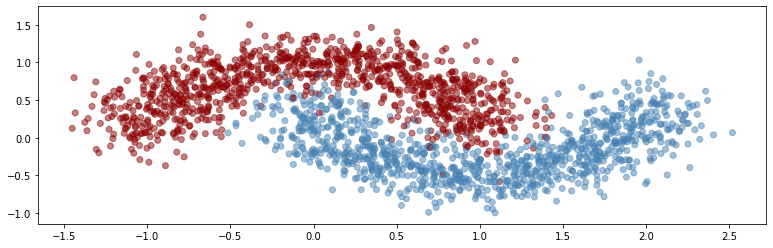

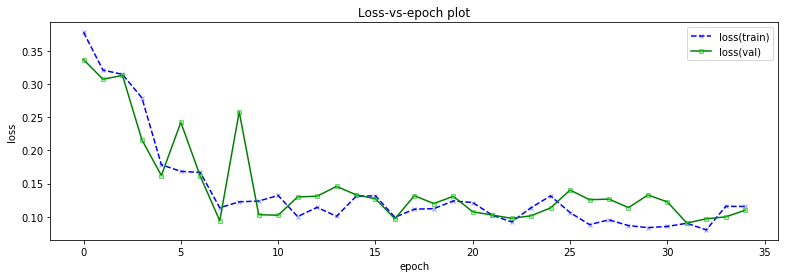

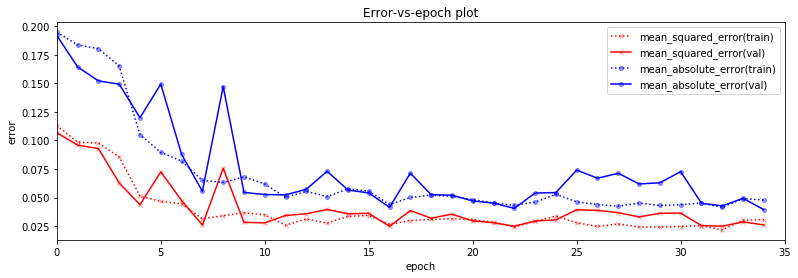

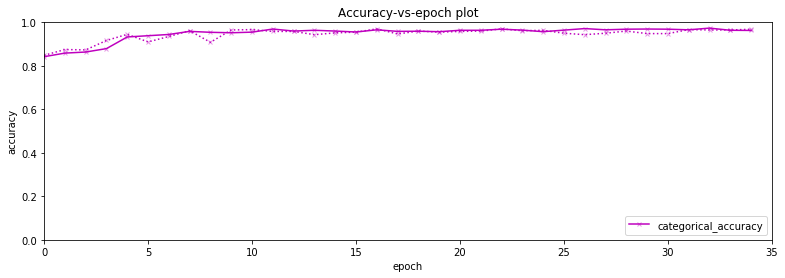

In [13]:
#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

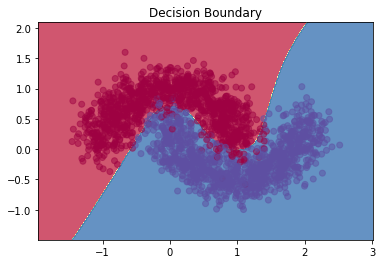

In [14]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral,alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=.5)

# Predict and plot decision boundary
plot_decision_boundary(lambda x: model.predict_classes(x, batch_size=200))
plt.title("Decision Boundary")
plt.show()

To relate the changes to accutacy score, accuracy-vs-epochs, loss-vs-epoch and decision boundary plots we make a table with the changed hyper parameters. If the accuracy score worsen then the change is reverted and discarted, if the accuracy score improves then the change is keept moving forward with new changes. * means that there is a code refference which can be seen below the table.



|Change to the model     |Optimizer|EPOCHS|accutacy score||decision boundary plot|
|---                     |---      |---   |---           ||---                   |
|Original                |ADAM     |35    |0.967         || <img src="DB_original.png" alt="Drawing" style="width: 200px;"/>|
|(Qb.0) Trying SGD       |SGD      |35   |0.885          ||<img src="DB_SGD_35.png" alt="Drawing" style="width: 200px;"/>|
|(Qb.1) Improved SGD     |SGD      |1200   |0.963        ||<img src="DB_SGD1l.png" alt="Drawing" style="width: 200px;"/>|
|(Qc.0*) Change nr of epochs|ADAM      |100   |0.9617       ||<img src="DB_A_100_DB.png" alt="Drawing" style="width: 200px;"/>|
|(Qc.1*) Adding a hidden layer|ADAM      |35   |0.9467       | |<img src="A_NewL_DB.png" alt="Drawing" style="width: 200px;"/>|
|(Qc.2*) Adding a hidden layer <br> And changing nr of epochs|ADAM      |100   |0.9683       ||<img src="DB_ALCE.png" alt="Drawing" style="width: 200px;"/>|
|(Qc.3*) Changing layer activation to relu|ADAM      |100   |0.94167     ||<img src="DB_relu.png" alt="Drawing" style="width: 200px;"/>|
|(Qc.4*) Changing output layer activation <br> to sigmoid|ADAM      |100   |0.95333     ||<img src="DB_sigmoid.png" alt="Drawing" style="width: 200px;"/>|
|(Qc.5*) Changing output layer activation <br> to sigmoid and Changing layer <br> activation to relu |ADAM      |100   |0.95333     ||<img src="DB_reSIG.png" alt="Drawing" style="width: 200px;"/>|
|(Qc.6*) Changing to 2 neurons <br>and 300 epochs|ADAM      |300   |0.8767     ||<img src="2neurons.png" alt="Drawing" style="width: 200px;"/>|
|(Qc.7*) Changing to 50 neurons|ADAM      |35   |0.9667     ||<img src="5neurons.png" alt="Drawing" style="width: 200px;"/>|

\*Qc.0: 
```python EPOCHS      = 100```

\*Qc.1: 
```python
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(4,activation='tanh')) # New hidden layer with 4 params
model.add(Dense(units=2, activation="softmax"))```


\*Qc.2: 
```python
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(4,activation='tanh')) # New hidden layer with 4 params
model.add(Dense(units=2, activation="softmax"))

EPOCHS      = 100```

\*Qc.3: 
```python
model.add(Dense(input_dim=2, units=8, activation="relu", kernel_initializer="normal"))
model.add(Dense(4,activation='relu')) # New hidden layer with 4 params
model.add(Dense(units=2, activation="softmax"))

EPOCHS      = 100```


\*Qc.4: 
```python
model.add(Dense(input_dim=2, units=8, activation="tanh", kernel_initializer="normal"))
model.add(Dense(4,activation='tanh')) # New hidden layer with 4 params
model.add(Dense(units=2, activation="sigmoid"))

EPOCHS      = 100```

\*Qc.5: 
```python
model.add(Dense(input_dim=2, units=8, activation="relu", kernel_initializer="normal"))
model.add(Dense(input_dim=8, units=8, activation='relu'))
model.add(Dense(units=2, activation="sigmoid"))

EPOCHS      = 100```

\*Qc.6: 
```python
model.add(Dense(input_dim=2, units=2, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=2, activation="softmax"))

EPOCHS      = 300```

\*Qc.7: 
```python
model.add(Dense(input_dim=2, units=50, activation="tanh", kernel_initializer="normal"))
model.add(Dense(units=2, activation="softmax"))

EPOCHS      = 35```


### TODO!!!!! conclussion


Accuracy-vs-epochs and loss-vs-epoc dont change much from the different plots when tuning on the hyper parameters. However when we change the optimizer we observe that we need a lot more epochs to make a clasifikation than with adam.


| Adam 35 EPOCHS | SGD 35 EPOCHS | SGD 100 EPOCHS |
| --- | --- | ---- |
|<img src="ADAM_GRAPH.png" alt="Drawing" style="width: 300px;"/>|<img src="SGD_GRAPHS.png" alt="Drawing" style="width: 300px;"/>|<img src="SGD_GRAPHS02.png" alt="Drawing" style="width: 300px;"/>|


SGD_GRAPHS

unless we change optimizer from ADAM to SGD, or if we change the number of neurons, where we then need 








### [OPTIONAL] Qd Cross Entropy

Explain loss='categorical_crossentropy. What is cross-entropy, and how is it used as a norm/distance? Why choose cross-entropy instead of MSE or MAE?


In [15]:
# TODO: Qd in text..